In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [ ]:
# Matriks tridiagonal
def tridag(a,b,c,u,n,ng):
    temp=b[0]
    u[0]=u[0]/temp
    for j in range(1,n):
        temp1 = b[j]
        b[j]  = c/temp
        temp  = temp1-a*b[j]
        u[j]  = (u[j]-a*u[j-1])/temp
    for j in range (n-2,-1,-1):
        u[j]  = u[j]-b[j+1]*u[j+1]
    return u

# rumus filter untuk potensial 1 dimensi
def filter1D(dx,vpot,psi,energy,n,k):
    dx2 = dx*dx
    a = -0.5/dx2
    c = a
    odx2 = 1/dx2
    b=np.zeros(n)
    #k adalah jumlah perulangan filter
    for k in range(0,5):
        for i in range(0,n):
            b[i] = (odx2+vpot[i]-energy)
        global tridag
        psi = tridag(a,b,c,psi,n,n)
    fnorm = sum(psi*psi)*dx
    psi = psi / (fnorm**0.5)
    return psi

# rumusan hamiltonian
def hamiltonian(dx,vpot,psi,ng):
    dx2 = dx*dx
    a =-0.5/dx2
    c = a
    odx = 1/dx2
    u = np.zeros(ng)
    u[0] =((odx+vpot[0])*psi[0] + c*psi[1])
    for i in range (1,ng-1):
        u[i] = (a*psi[i-1]+(odx+vpot[i])*psi[i]+c*psi[i+1])
    u[-1]=((a*psi[-2])+(odx+vpot[-1])*psi[-1])
    psiu = psi*u
    energy_new = sum(psiu)*dx
    return energy_new

# Rumusan eigenstate
def eigenState(x, ngrid, vpot, initE, dx):
    if initE <= 0 :
        initE = initE + 1e-12
    x_tart = x[0]
    x_end = x[ngrid - 1]
    psi = np.zeros(ngrid)
    if x_tart < 0:
        for i in range(0,ngrid):
            psi[i] = (np.sin(x[i]) + np.cos(x[i]))
    else:
        for i in range(0,ngrid):
           psi[i] = 1 + x[i] / x_end
    #psi=np.linspace(1,1,ngrid) + x/x[-1]
    energy = initE
    error = 1e3
    loop = 1
    while error>1e-10:
        nloop = 10
        if loop ==1:
            nloop = 10 #nloop
        global filter1D
        global hamiltonian
        psi = filter1D(dx,vpot,psi,energy,ngrid,nloop)
        energy_new =  hamiltonian(dx,vpot,psi,ngrid)
        error = abs(energy_new-energy)#/energy
        energy = energy_new
        loop = loop+1
    output = [energy_new,psi]
    return output

<function matplotlib.pyplot.show(close=None, block=None)>

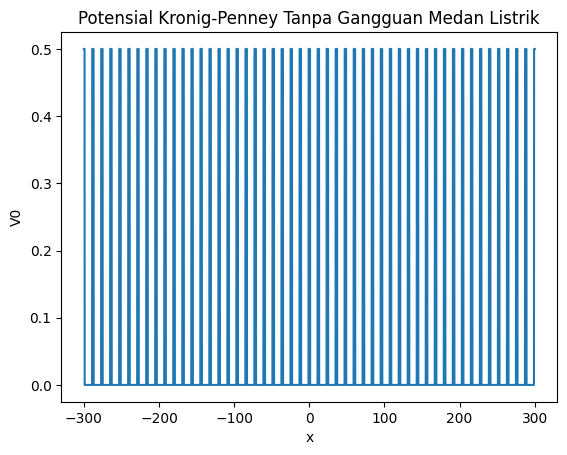

In [ ]:
#set sumur potensial, b=2
xmin = -300
xmax = 300
ngrid = 10000
r = np.linspace(xmin, xmax, ngrid)
dx = r[1]-r[0]
#a = 4
#b = 1
#c = 2
V = 0.5
a = 10
L = a+2
v0 = 0
#x = np.zeros (ngrid)
#ngrid = 10**4
#leb = xmax-xmin
#ngrid = int(leb/dx)
x = np.zeros (len(r))
v1 = np.zeros(len(r))
for i in range(0, len(r)):
 x[i] = xmin + ((i) * dx)
 for i in range(len(r)):
  ss = r[i]%L
  if ss < (L/2 - a/2) or ss > (L/2 + a/2):
    v1[i]=V
  else:
    v1[i]=0
 #vpot[i] = a**2 - c**2 - a**2*(np.cos(b*x[i]))**2 - 2j*a*c*np.sin(b*x[i])
plt.plot(x,v1)
#plt.xlim([95,105])
plt.title('Potensial Kronig-Penney Tanpa Gangguan Medan Listrik')
plt.xlabel('x')
plt.ylabel('V0')
plt.show

In [ ]:
step = 2000

In [ ]:
Einit1 = np.linspace(0,2,step)
En1 = np.zeros(step)
for i in range(step):
  E, psi = eigenState(r, ngrid, v1, Einit1[i], dx)
  En1[i] = E

In [ ]:
En1

array([0.0312584, 0.0312584, 0.0312584, ..., 2.0024433, 2.0024433,
       2.0024433])

In [ ]:
sorted_arr = np.sort(En1)

print(sorted_arr[:1000])

[0.03078763 0.03098608 0.03098608 0.03114698 0.03114698 0.03114698
 0.03114698 0.03120708 0.03120708 0.03120708 0.03120708 0.03120708
 0.03120708 0.03120708 0.0312584  0.0312584  0.0312584  0.0312584
 0.0312584  0.0312584  0.0312584  0.0312584  0.0312584  0.0312584
 0.0312584  0.0312584  0.0312584  0.0312584  0.0312584  0.0312584
 0.0312584  0.0312584  0.03168638 0.03168638 0.03168638 0.03168638
 0.03168638 0.03182347 0.03182347 0.03182347 0.03182347 0.03182347
 0.03182347 0.03182347 0.03182347 0.03198217 0.03198217 0.03198217
 0.03198217 0.0321187  0.0321187  0.0321187  0.03226793 0.03226793
 0.03244868 0.03244868 0.03244868 0.03261523 0.032779   0.03297275
 0.03297275 0.03297275 0.03316166 0.0333383  0.0333383  0.03353883
 0.03392718 0.03392718 0.03433746 0.03452546 0.03472125 0.03492753
 0.03511129 0.03548969 0.03582485 0.03600068 0.03615254 0.03615254
 0.03656097 0.03666201 0.03677942 0.03686273 0.03686273 0.03700384
 0.03700384 0.03706152 0.1208324  0.1208324  0.1208324  0.1213566

In [ ]:
sorted_arr = np.sort(En1)

print(sorted_arr[1001:2000])

[1.00220581 1.00220581 1.00220581 1.00693918 1.00693918 1.00693918
 1.00693918 1.00693918 1.00693918 1.00693918 1.01235186 1.01235186
 1.01235186 1.01781684 1.01781684 1.01781684 1.01781684 1.01781684
 1.01781684 1.01781684 1.01781684 1.02350657 1.02350657 1.02350657
 1.02965504 1.02965504 1.02965504 1.02965504 1.02965504 1.02965504
 1.02965504 1.02965504 1.02965504 1.03581565 1.03581565 1.03581565
 1.03581565 1.04202524 1.04202524 1.04202524 1.04202524 1.04202524
 1.04202524 1.04202524 1.04202524 1.04202524 1.04857121 1.04857121
 1.04857121 1.05513033 1.05513033 1.05513033 1.05513033 1.05513033
 1.05513033 1.05513033 1.05513033 1.05513033 1.05513033 1.0616619
 1.0616619  1.0616619  1.0616619  1.0684589  1.0684589  1.0684589
 1.0684589  1.0684589  1.0684589  1.0684589  1.0684589  1.0684589
 1.07528163 1.07528163 1.07528163 1.07528163 1.08203858 1.08203858
 1.08203858 1.08203858 1.08203858 1.08203858 1.08203858 1.08203858
 1.08203858 1.08203858 1.08901574 1.08901574 1.08901574 1.0890157

<function matplotlib.pyplot.show(close=None, block=None)>

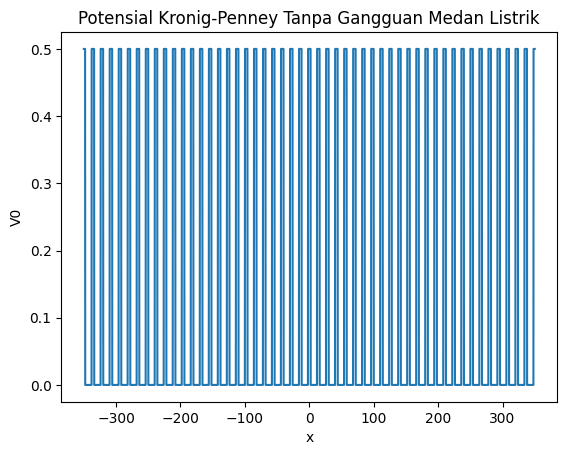

In [ ]:
#set sumur potensial, b=4
xmin = -350
xmax = 350
ngrid = 10000
r = np.linspace(xmin, xmax, ngrid)
dx = r[1]-r[0]
#a = 4
#b = 1
#c = 2
V = 0.5
a = 10
L = a+4
v0 = 0
#x = np.zeros (ngrid)
#ngrid = 10**4
#leb = xmax-xmin
#ngrid = int(leb/dx)
x = np.zeros (len(r))
v2 = np.zeros(len(r))
for i in range(0, len(r)):
 x[i] = xmin + ((i) * dx)
 for i in range(len(r)):
  ss = r[i]%L
  if ss < (L/2 - a/2) or ss > (L/2 + a/2):
    v2[i]=V
  else:
    v2[i]=0
 #vpot[i] = a**2 - c**2 - a**2*(np.cos(b*x[i]))**2 - 2j*a*c*np.sin(b*x[i])
plt.plot(x,v2)
#plt.xlim([95,105])
plt.title('Potensial Kronig-Penney Tanpa Gangguan Medan Listrik')
plt.xlabel('x')
plt.ylabel('V0')
plt.show

In [ ]:
step = 2000

In [ ]:
Einit2 = np.linspace(0,2,step)
En2 = np.zeros(step)
for i in range(step):
  E, psi = eigenState(r, ngrid, v2, Einit2[i], dx)
  En2[i] = E

In [ ]:
En2

array([0.03405525, 0.03405525, 0.03405525, ..., 1.99929573, 1.99929573,
       1.99929573])

In [ ]:
sorted_arr = np.sort(En2)

print(sorted_arr[:1000])

[0.03392825 0.03399083 0.03399083 0.0339917  0.03404354 0.03404354
 0.03404354 0.03404354 0.03404354 0.03404354 0.03404354 0.03405525
 0.03405525 0.03405525 0.03405525 0.03405525 0.03405525 0.03405525
 0.03405525 0.03405525 0.03405525 0.03405525 0.03405525 0.03405525
 0.03405525 0.03405525 0.03405525 0.03405525 0.03405525 0.03405525
 0.03405525 0.03405525 0.03405525 0.03405525 0.03405525 0.03406899
 0.03406899 0.03406899 0.03406899 0.03406899 0.03406899 0.03406899
 0.03406899 0.03406899 0.03406899 0.03406899 0.03406899 0.03406899
 0.03406899 0.03406899 0.03406899 0.03406899 0.03411311 0.03411311
 0.03411311 0.03411311 0.03411311 0.03411311 0.03411311 0.03411311
 0.03411311 0.03411311 0.03411311 0.03411311 0.03411311 0.03412648
 0.03412648 0.03412648 0.03412648 0.03415444 0.03415444 0.03415444
 0.0342019  0.0342019  0.03424404 0.03428913 0.03431558 0.03437743
 0.03441128 0.0345942  0.0345942  0.03471624 0.03481577 0.03481577
 0.1320637  0.13225232 0.13225232 0.13225232 0.13312368 0.1331

In [ ]:
sorted_arr = np.sort(En2)

print(sorted_arr[1001:2000])

[0.99968232 0.99968232 1.00476134 1.00476134 1.00476134 1.00476134
 1.00987788 1.00987788 1.00987788 1.00987788 1.00987788 1.00987788
 1.01458665 1.01458665 1.01458665 1.01458665 1.01947732 1.01947732
 1.01947732 1.01947732 1.01947732 1.02373698 1.02373698 1.02373698
 1.02373698 1.02785488 1.02785488 1.02785488 1.02785488 1.03147935
 1.03147935 1.03147935 1.0339226  1.0339226  1.0339226  1.0339226
 1.0339226  1.0339226  1.0339226  1.0339226  1.0339226  1.0339226
 1.0339226  1.0339226  1.0339226  1.0339226  1.0339226  1.0339226
 1.0339226  1.03651857 1.03651857 1.03651857 1.03651857 1.03651857
 1.03651857 1.03651857 1.03651857 1.03651857 1.03651857 1.03651857
 1.03651857 1.08923781 1.08923781 1.08923781 1.08923781 1.08923781
 1.08923781 1.08923781 1.08923781 1.08923781 1.08923781 1.08923781
 1.08923781 1.08923781 1.08940459 1.08940459 1.08940459 1.08940459
 1.08940459 1.08940459 1.08940459 1.08940459 1.08940459 1.08940459
 1.08940459 1.08940459 1.08940459 1.08940459 1.08940459 1.0894045

<function matplotlib.pyplot.show(close=None, block=None)>

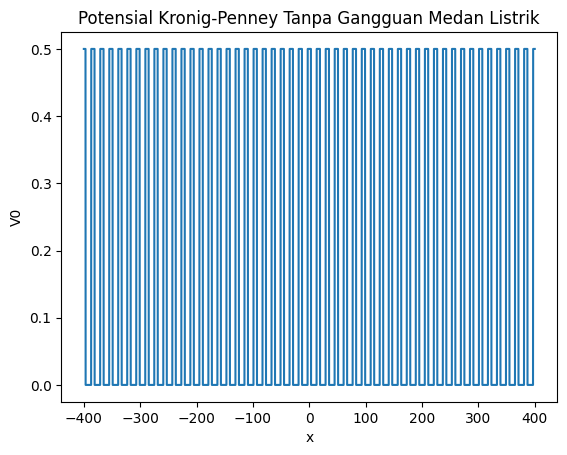

In [ ]:
#set sumur potensial, b=6
xmin = -400
xmax = 400
ngrid = 10000
r = np.linspace(xmin, xmax, ngrid)
dx = r[1]-r[0]
#a = 4
#b = 1
#c = 2
V = 0.5
a = 10
L = a+6
v0 = 0
#x = np.zeros (ngrid)
#ngrid = 10**4
#leb = xmax-xmin
#ngrid = int(leb/dx)
x = np.zeros (len(r))
v3 = np.zeros(len(r))
for i in range(0, len(r)):
 x[i] = xmin + ((i) * dx)
 for i in range(len(r)):
  ss = r[i]%L
  if ss < (L/2 - a/2) or ss > (L/2 + a/2):
    v3[i]=V
  else:
    v3[i]=0
 #vpot[i] = a**2 - c**2 - a**2*(np.cos(b*x[i]))**2 - 2j*a*c*np.sin(b*x[i])
plt.plot(x,v3)
#plt.xlim([95,105])
plt.title('Potensial Kronig-Penney Tanpa Gangguan Medan Listrik')
plt.xlabel('x')
plt.ylabel('V0')
plt.show

In [ ]:
step = 2000

In [ ]:
Einit3 = np.linspace(0,2,step)
En3 = np.zeros(step)
for i in range(step):
  E, psi = eigenState(r, ngrid, v3, Einit3[i], dx)
  En3[i] = E

In [ ]:
En3

array([0.03418469, 0.03418469, 0.03418469, ..., 1.99691679, 1.99691679,
       1.99691679])

In [ ]:
sorted_arr = np.sort(En3)

print(sorted_arr[:1000])

[0.03406173 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469 0.03418469
 0.03418544 0.03418544 0.03418632 0.03418661 0.03418715 0.03418715
 0.13424746 0.13425179 0.13425489 0.13425489 0.13426209 0.1342

In [ ]:
sorted_arr = np.sort(En3)

print(sorted_arr[1001:2000])

[1.00220062 1.00220062 1.00220062 1.00694348 1.00694348 1.00694348
 1.00694348 1.00694348 1.01154078 1.01154078 1.01154078 1.01154078
 1.01154078 1.01633102 1.01633102 1.01633102 1.01633102 1.01633102
 1.02097608 1.02097608 1.02097608 1.02097608 1.02580981 1.02580981
 1.02580981 1.02580981 1.02580981 1.0304974  1.0304974  1.0304974
 1.0304974  1.0304974  1.03537145 1.03537145 1.03537145 1.03537145
 1.03537145 1.04009688 1.04009688 1.04009688 1.04009688 1.04009688
 1.04500841 1.04500841 1.04500841 1.04500841 1.04976702 1.04976702
 1.04976702 1.04976702 1.04976702 1.04976702 1.05471314 1.05471314
 1.05471314 1.05471314 1.05949974 1.05949974 1.05949974 1.05949974
 1.05949974 1.06447708 1.06447708 1.06447708 1.06447708 1.06447708
 1.06928519 1.06928519 1.06928519 1.06928519 1.06928519 1.07428913
 1.07428913 1.07428913 1.07428913 1.07428913 1.07910971 1.07910971
 1.07910971 1.07910971 1.07910971 1.08413312 1.08413312 1.08413312
 1.08413312 1.08895209 1.08895209 1.08895209 1.08895209 1.08895

In [ ]:
X1 = np.zeros([2000])
X2 = np.zeros([2000])
X3 = np.zeros([2000])
for i in range(2000):
  X1[i] = 1
  X2[i] = 1.5
  X3[i] = 2


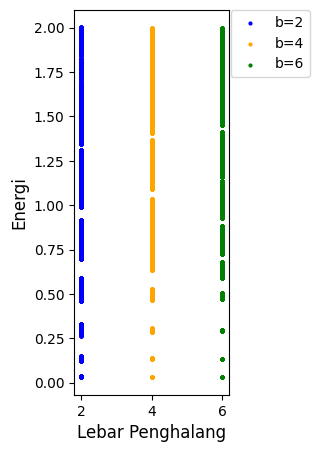

In [ ]:
plt.figure(figsize=(2,5))
plt.scatter(X1, En1, s=4, color='blue', label='b=2')
plt.scatter(X2, En2, s=4, color='orange', label='b=3')
plt.scatter(X3, En3, s=4, color='green', label='b=4')
plt.xticks(ticks=[1, 1.5, 2], labels=['2', '3', '4'])
#plt.title('Variasi Lebar Penghalang Tanpa Distorsi')
plt.rcParams['axes.labelsize'] = 12
plt.xlabel('Lebar Penghalang')
plt.ylabel('Energi')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.show()

<Figure size 1500x1000 with 0 Axes>

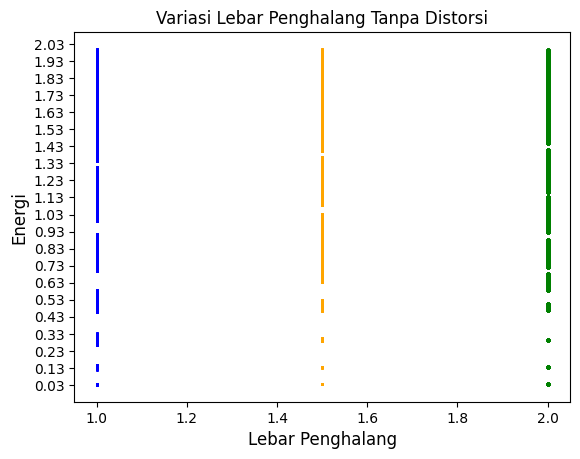

<Figure size 1500x1000 with 0 Axes>

In [ ]:

plt.scatter(X1, En1, s=1, color='blue', label='a=0,5')
plt.scatter(X2, En2, s=1, color='orange', label='a=1')
plt.scatter(X3, En3, s=4, color='green', label='a=2')
#plt.scatter(X4, ener_new_arr_adua, s=1, color='red', label='a=5')
#plt.ylim(0, 0.5)
#plt.ylim(-1,2)
plt.yticks(np.arange(min(En1), max(En1)+0.1, 0.1))
plt.title('Variasi Lebar Penghalang Tanpa Distorsi')
plt.xlabel('Lebar Penghalang')
plt.ylabel('Energi')
plt.figure(figsize=(15, 10))


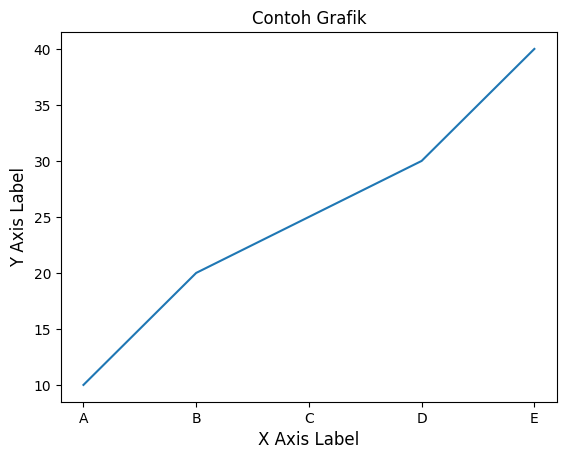

In [ ]:
import matplotlib.pyplot as plt

# Data contoh
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]

plt.plot(x, y)

# Mengubah label sumbu-x
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['A', 'B', 'C', 'D', 'E'])

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Contoh Grafik')

plt.show()
